In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

##**Creating** **Dataset**

**Let's say we take the linear function as:   $y = 2x^2 + 2x + 3$**

In [152]:
X = 20*np.array(list(set(np.random.random(size = 150).tolist())))-10

In [153]:
len(X)

150

In [179]:
noise = 10*np.random.randn(len(X))
Y = 2*X*X + 2*X + 3 + noise

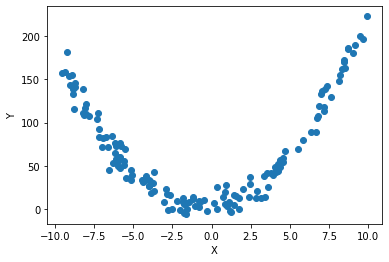

In [180]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##**Initialising** **Parameters**

In [156]:
# Assume y = m*x*x + n*x + p

m = np.random.rand()
n = np.random.rand()
p = np.random.rand()

print(m,n,p)

0.6191981102580747 0.3735960298955494 0.8939122220043337


##**Polynomial Regression (degree 2) using |x -  x̂|⁴ as loss**

In [190]:
a = m
b = n
c = p

#I have chosen a different learning rate for c because on increasing the rate, the gradients explode but on keeping it low, c gets optimised very slowly

epochs = 200000
learning_rate = 1e-9
learning_rate_c = 1e-7
batch_size = 10

loss1 = []
l = 0

start = time.time()

for i in range(epochs):
  l = 0  
  
  for j in range(int(len(X)/batch_size)):
    da=0
    db=0
    dc=0
    for k in range(j*batch_size,(j+1)*batch_size):
      pred = a*X[k]*X[k] + b*X[k] + c
      l += (pred-Y[k])**4
      da += 4*((pred-Y[k])**3)*X[k]*X[k]
      db += 4*((pred-Y[k])**3)*X[k]
      dc += 4*((pred-Y[k])**3)
    #print(a,b,c)
    a = a - learning_rate*da
    b = b - learning_rate*db
    c = c - learning_rate_c*dc
    #print(a,b,c)

  loss1.append(l)


print("Time taken - {}".format(time.time()-start))

Time taken - 203.00788259506226


In [191]:
a1 = a
b1 = b
c1 = c
print(a1,b1,c1)

1.9955862041775847 2.1663590959577292 3.7202255842439746


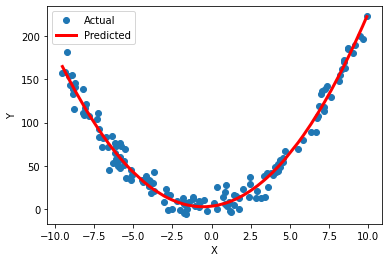

In [192]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.sort(X),a1*np.sort(X)*np.sort(X) + b1*np.sort(X) + c1,color='red',linewidth=3)
plt.legend(['Actual','Predicted'])
plt.show()

##**Polynomial Regression (degree 2) using |x -  x̂|⁷ as loss**

In [210]:
a = m
b = n
c = p

epochs = 200000
learning_rate = 1e-15
learning_rate_c = 1e-12
batch_size = 10

loss2 = []
l = 0

start = time.time()

for i in range(epochs):
  l = 0  
  print("Start of epoch {}".format(i+1))
  for j in range(int(len(X)/batch_size)):

    da=0
    db=0
    dc=0

    for k in range(j*batch_size,(j+1)*batch_size):
      pred = a*X[k]*X[k] + b*X[k] + c

      if pred>Y[k]:
        l += (pred-Y[k])**7
        da += 7*((pred-Y[k])**6)*X[k]*X[k]
        db += 7*((pred-Y[k])**6)*X[k]
        dc += 7*((pred-Y[k])**6)
      else:
        l += (Y[k]-pred)**7
        da += -7*((pred-Y[k])**6)*X[k]*X[k]
        db += -7*((pred-Y[k])**6)*X[k]
        dc += -7*((pred-Y[k])**6)

    a = a - learning_rate*da
    b = b - learning_rate*db
    c = c - learning_rate_c*dc


  loss2.append(l)
  print(l)


print("Time taken - {}".format(time.time()-start))

Streaming output truncated to the last 5000 lines.
48764545251.50879
Start of epoch 197502
48764545251.50739
Start of epoch 197503
48764545251.50557
Start of epoch 197504
48764545251.50373
Start of epoch 197505
48764545251.50215
Start of epoch 197506
48764545251.50012
Start of epoch 197507
48764545251.49856
Start of epoch 197508
48764545251.496544
Start of epoch 197509
48764545251.49471
Start of epoch 197510
48764545251.49348
Start of epoch 197511
48764545251.49134
Start of epoch 197512
48764545251.489685
Start of epoch 197513
48764545251.48799
Start of epoch 197514
48764545251.48591
Start of epoch 197515
48764545251.4845
Start of epoch 197516
48764545251.4827
Start of epoch 197517
48764545251.48104
Start of epoch 197518
48764545251.4792
Start of epoch 197519
48764545251.47741
Start of epoch 197520
48764545251.475525
Start of epoch 197521
48764545251.474045
Start of epoch 197522
48764545251.4723
Start of epoch 197523
48764545251.470535
Start of epoch 197524
48764545251.46883
Start of e

In [211]:
a2 = a
b2 = b
c2 = c
print(a2,b2,c2)

2.0235410139242838 2.2885945488502117 2.5625065051593574


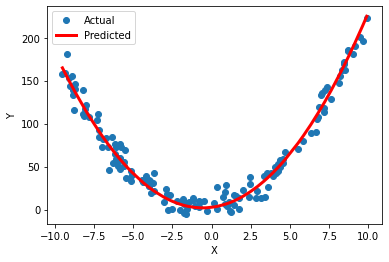

In [212]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.sort(X),a2*np.sort(X)*np.sort(X) + b2*np.sort(X) + c2,color='red',linewidth=3)
plt.legend(['Actual','Predicted'])
plt.show()

##**Loss** **Graphs**

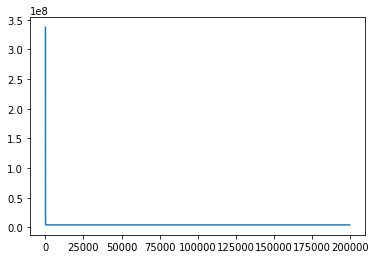

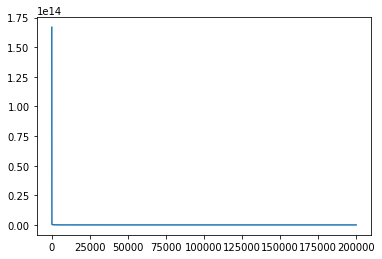

In [217]:
plt.plot(range(epochs),loss1)
#plt.ylim((0,1e10))
plt.show()
plt.plot(range(epochs),loss2)
#plt.ylim((0,1e10))
plt.show()

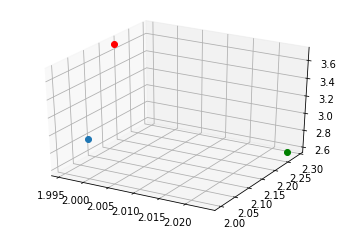

In [224]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D([2],[2],[3],marker='o')
ax.plot3D([a1],[b1],[c1],'red',marker='o')
ax.plot3D([a2],[b2],[c2],'green',marker='o')
plt.show()